# Netflix Movie Reccomendation System

## Business Understanding

Netflix is looking to improve their reccomendation system for new users.  As part of a new trial membership program Netflix is looking to maximize their customer retention by providing the best possible reccomendations.  

Netflix has attracted new users by using a free weekly trial membership.  In order to maximize the number of customers that continue their membership, the reccomendations must be match the customers preferences.  If the reccomendations are on point the customer is more likely to feel like there are enough options to continue the service past the free trial.

In [1]:
#initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data 
Import the four datasets to inspect and eventually combine into one dataframe for modeling.

The data is in the data folder:
* data/links.csv
* data/movies.csv
* data/ratings.csv
* data/tags.csv

###  Links dataframe

this dataframe will come in handy if we end up using additional data from imdb and the tmd for features in our model.

In [2]:
links = pd.read_csv('data/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


### Movies DataFrame

this contains the title and genre of the movies. The movieId column matches with our links dataframe. For example movieId 1 matches  with movieId Toystory.  

In [4]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
#extract the year of film from the title using regex to extract the year
movies['year'] = movies.title.str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Ratings DataFrame 

This dataframe contains userId, movieId, rating and a timestamp.

In [7]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
ratings.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

### Tags DataFrame

The tags dataframe has userId, movieId, tag and timestamp

In [11]:
tags = pd.read_csv('data/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Tags may be an important feature we will want to explore the tags and see if we can pinpoint some of the most used tags to add to our data

In [13]:
#tag value counts
tags.tag.value_counts()

In Netflix queue       131
atmospheric             36
thought-provoking       24
superhero               24
Disney                  23
                      ... 
Neil Patrick Harris      1
claims to be true        1
truckers                 1
Indonesia                1
2D animation             1
Name: tag, Length: 1589, dtype: int64

In [14]:
#create tag dictionary
keys = tags['tag'].value_counts(dropna=False).keys().tolist()
vals = tags['tag'].value_counts(dropna=False).tolist()
tag_dict = dict(zip(keys, vals))
tag_dict

{'In Netflix queue': 131,
 'atmospheric': 36,
 'thought-provoking': 24,
 'superhero': 24,
 'Disney': 23,
 'funny': 23,
 'surreal': 23,
 'religion': 22,
 'dark comedy': 21,
 'sci-fi': 21,
 'psychology': 21,
 'quirky': 21,
 'suspense': 20,
 'crime': 19,
 'twist ending': 19,
 'visually appealing': 19,
 'politics': 18,
 'time travel': 16,
 'mental illness': 16,
 'music': 16,
 'comedy': 15,
 'aliens': 15,
 'dark': 15,
 'dreamlike': 14,
 'mindfuck': 14,
 'space': 14,
 'heist': 13,
 'emotional': 13,
 'black comedy': 13,
 'high school': 12,
 'Stephen King': 12,
 'action': 12,
 'court': 12,
 'disturbing': 12,
 'Shakespeare': 12,
 'anime': 12,
 'journalism': 12,
 'satire': 12,
 'adolescence': 11,
 'adultery': 11,
 'classic': 11,
 'comic book': 11,
 'Holocaust': 11,
 'psychological': 11,
 'boxing': 11,
 'imdb top 250': 11,
 'India': 10,
 'animation': 10,
 'Australia': 10,
 'drugs': 10,
 'Leonardo DiCaprio': 10,
 'cinematography': 10,
 'Vietnam': 10,
 'robots': 10,
 'Mafia': 10,
 'philosophical': 

We may come back to the tags later. 

## Combined DataFrame

Below we will add the movie titles and genres to the ratings data to make a combined data frame

1. start the ratings dataframe and drop the timestamp.
2. use the movieId column to add the title and genre of the movie

In [15]:
#combined dataframe
#drop the timestamp column
df = ratings.drop('timestamp', axis=1)
#add title,genre and year using merge how=left will prevent more rows being added
df = df.merge(movies, on='movieId', how='left')
df.head()


,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [16]:
df.shape

(100836, 6)

In [17]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


User ids range from 1-610.  We will need to create new user ids that are outside of this range.


## Further Data Exploration


In [18]:
#number of unique users
n_users = df.userId.nunique()
print(n_users,'users that have rated movies.')
##movies rated
mov_rat=df.movieId.nunique()
print(mov_rat,'different movies rated')

610 users that have rated movies.
9724 different movies rated


In [30]:
##top 20 best rated movies
agg_function = {'rating':['mean','count']}
movie_ratings = df.groupby(['movieId','title','genres']).agg(agg_function)
movie_ratings.sort_values(by=('rating','mean'), ascending=False)

rating  \
                                                                                mean   
movieId title                                 genres                                   
88448   Paper Birds (Pájaros de papel) (2010) Comedy|Drama                       5.0   
100556  Act of Killing, The (2012)            Documentary                        5.0   
143031  Jump In! (2007)                       Comedy|Drama|Romance               5.0   
143511  Human (2015)                          Documentary                        5.0   
143559  L.A. Slasher (2015)                   Comedy|Crime|Fantasy               5.0   
...                                                                              ...   
157172  Wizards of the Lost Kingdom II (1989) Action|Fantasy                     0.5   
85334   Hard Ticket to Hawaii (1987)          Action|Comedy                      0.5   
53453   Starcrash (a.k.a. Star Crash) (1978)  Action|Adventure|Fantasy|Sci-Fi    0.5   
8494    Cincinnati Kid, The (1965)            Drama                              0.5   
71810   Legionnaire (1998)                    Action|Adventure|Drama|War         0.5   

                                                                                     
                                                                              count  
movieId title                                 genres                                 
88448   Paper Birds (Pájaros de papel) (2010) Comedy|Drama                        1  
100556  Act of Killing, The (2012)            Documentary                         1  
143031  Jump In! (2007)                       Comedy|Drama|Romance                1  
143511  Human (2015)                          Documentary                         1  
143559  L.A. Slasher (2015)                   Comedy|Crime|Fantasy                1  
...                                                                             ...  
157172  Wizards of the Lost Kingdom II (1989) Action|Fantasy                      1  
85334   Hard Ticket to Hawaii (1987)          Action|Comedy                       1  
53453   Starcrash (a.k.a. Star Crash) (1978)  Action|Adventure|Fantasy|Sci-Fi     1  
8494    Cincinnati Kid, The (1965)            Drama                               1  
71810   Legionnaire (1998)                    Action|Adventure|Drama|War          1  

[9724 rows x 2 columns]

We can see that we have many 5 rated movies as well as many .5 rated movies.  It is good to know how many times each movie was rated as I have never heard of any of the movies that are currently listed at the top of the rating list.  We have added the count to the agg function so now we can sort the movies by count.

In [31]:
movie_ratings.sort_values(by=('rating','count'), ascending=False)

rating  \
                                                                                mean   
movieId title                                  genres                                  
356     Forrest Gump (1994)                    Comedy|Drama|Romance|War     4.164134   
318     Shawshank Redemption, The (1994)       Crime|Drama                  4.429022   
296     Pulp Fiction (1994)                    Comedy|Crime|Drama|Thriller  4.197068   
593     Silence of the Lambs, The (1991)       Crime|Horror|Thriller        4.161290   
2571    Matrix, The (1999)                     Action|Sci-Fi|Thriller       4.192446   
...                                                                              ...   
4093    Cop (1988)                             Thriller                     1.500000   
4089    Born in East L.A. (1987)               Comedy                       2.000000   
58351   City of Men (Cidade dos Homens) (2007) Drama                        4.000000   
4083    Best Seller (1987)                     Thriller                     4.000000   
193609  Andrew Dice Clay: Dice Rules (1991)    Comedy                       4.000000   

                                                                                  
                                                                           count  
movieId title                                  genres                             
356     Forrest Gump (1994)                    Comedy|Drama|Romance|War      329  
318     Shawshank Redemption, The (1994)       Crime|Drama                   317  
296     Pulp Fiction (1994)                    Comedy|Crime|Drama|Thriller   307  
593     Silence of the Lambs, The (1991)       Crime|Horror|Thriller         279  
2571    Matrix, The (1999)                     Action|Sci-Fi|Thriller        278  
...                                                                          ...  
4093    Cop (1988)                             Thriller                        1  
4089    Born in East L.A. (1987)               Comedy                          1  
58351   City of Men (Cidade dos Homens) (2007) Drama                           1  
4083    Best Seller (1987)                     Thriller                        1  
193609  Andrew Dice Clay: Dice Rules (1991)    Comedy                          1  

[9724 rows x 2 columns]

Now the movies at the top of the list are recognizable.  Now we have an idea of movies that have been rated alot and most likely watched the most.  This will be helpful when selecting movies for new users to rate.  We want to only suggest movies that we currently have a good number of ratings for.  This will make it more likely that they have seen the movie and it will make our model more useful because their will me users that have rated those movies.

Currently we have movies with anywhere from 1-329 rankings.  

##### Finding the Best Movies for User Survey

It may be interesting to find movies that have a good balance amoung ratings.  These movies may be better at pinpointing what a new user may like.  for example movies that get mostly ratings of 4 or 5 may not tell us as much about a viewer as movies that recieve an equal amount of ratings from 1-5 or polarizing ratings. How do we do this...

For the sake of time we will limit the movies included in the user survey to movies that have atleast n ratings. 

We can plot rating counts to see what a good number will be.

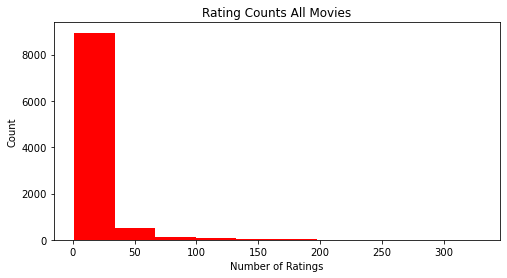

In [32]:
#histogram of rating count
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(movie_ratings[('rating','count')],bins=10, color='red')
ax.set_title('Rating Counts All Movies')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Ratings')
plt.show()

It looks like if we limit the movies for the survey to any movie that has more than 20 ratings we will have a good number of movies that the user has possibly seen and that enough other people have rated.

In [25]:
survey_movies = movie_ratings[movie_ratings[('rating','count')]>20]
survey_movies

rating  \
                                                                                             mean   
movieId title                               genres                                                  
1       Toy Story (1995)                    Adventure|Animation|Children|Comedy|Fantasy  3.920930   
2       Jumanji (1995)                      Adventure|Children|Fantasy                   3.431818   
3       Grumpier Old Men (1995)             Comedy|Romance                               3.259615   
5       Father of the Bride Part II (1995)  Comedy                                       3.071429   
6       Heat (1995)                         Action|Crime|Thriller                        3.946078   
...                                                                                           ...   
148626  Big Short, The (2015)               Drama                                        3.961538   
152081  Zootopia (2016)                     Action|Adventure|Animation|Children|Comedy   3.890625   
164179  Arrival (2016)                      Sci-Fi                                       3.980769   
166528  Rogue One: A Star Wars Story (2016) Action|Adventure|Fantasy|Sci-Fi              3.925926   
168252  Logan (2017)                        Action|Sci-Fi                                4.280000   

                                                                                               
                                                                                        count  
movieId title                               genres                                             
1       Toy Story (1995)                    Adventure|Animation|Children|Comedy|Fantasy   215  
2       Jumanji (1995)                      Adventure|Children|Fantasy                    110  
3       Grumpier Old Men (1995)             Comedy|Romance                                 52  
5       Father of the Bride Part II (1995)  Comedy                                         49  
6       Heat (1995)                         Action|Crime|Thriller                         102  
...                                                                                       ...  
148626  Big Short, The (2015)               Drama                                          26  
152081  Zootopia (2016)                     Action|Adventure|Animation|Children|Comedy     32  
164179  Arrival (2016)                      Sci-Fi                                         26  
166528  Rogue One: A Star Wars Story (2016) Action|Adventure|Fantasy|Sci-Fi                27  
168252  Logan (2017)                        Action|Sci-Fi                                  25  

[1235 rows x 2 columns]

1235 movies will be included in our user rating survey.

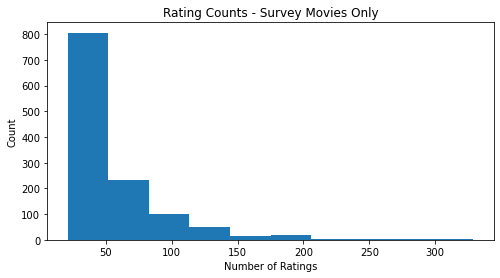

In [33]:
#histogram of rating count
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(survey_movies[('rating','count')],bins=10)
ax.set_title('Rating Counts - Survey Movies Only')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Ratings')
plt.show()

## Ratings Distribution Breakdown
Visualizing the ratings. 

In [34]:
rating_table = pd.DataFrame(df.groupby(['rating']).size(),columns=['Count']).reset_index()
rating_table

,rating,Count
0,0.5,1370
1,1.0,2811
2,1.5,1791
3,2.0,7551
4,2.5,5550
5,3.0,20047
6,3.5,13136
7,4.0,26818
8,4.5,8551
9,5.0,13211


<function matplotlib.pyplot.show(close=None, block=None)>

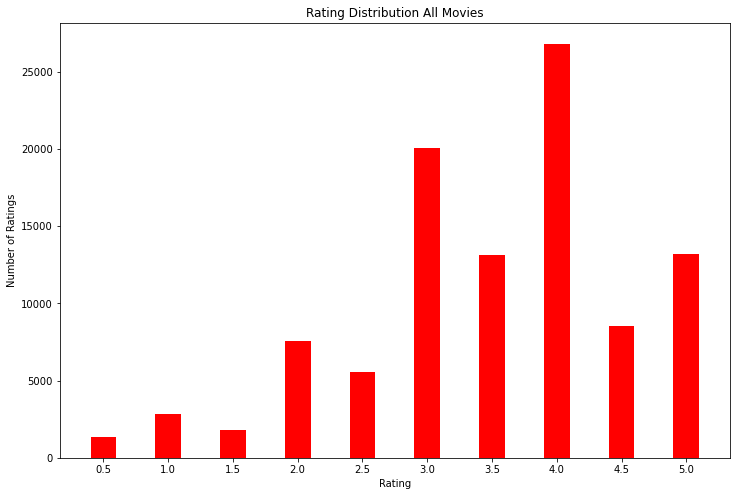

In [35]:
## ratings histogram
xs = rating_table['rating']
ys = rating_table['Count']
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(xs,ys,tick_label=xs, width=0.2, color='red')
ax.set_title('Rating Distribution All Movies')
ax.set_ylabel('Number of Ratings')
ax.set_xlabel('Rating')
plt.show

### Movies By Year

In [36]:
movies.year.value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1915      1
1919      1
1917      1
1903      1
1922      1
Name: year, Length: 106, dtype: int64

In [37]:
movies['year'] = movies['year'].apply(pd.to_numeric)


In [38]:
max_year = movies.year.max()
min_year = movies.year.min()
print('Data includes movies from {} to {}'.format(min_year,max_year))

Data includes movies from 1902.0 to 2018.0


In [39]:
by_year = pd.DataFrame(movies.groupby(['year']).size(),columns=['Count']).reset_index()
by_year.head()

,year,Count
0,1902.0,1
1,1903.0,1
2,1908.0,1
3,1915.0,1
4,1916.0,4


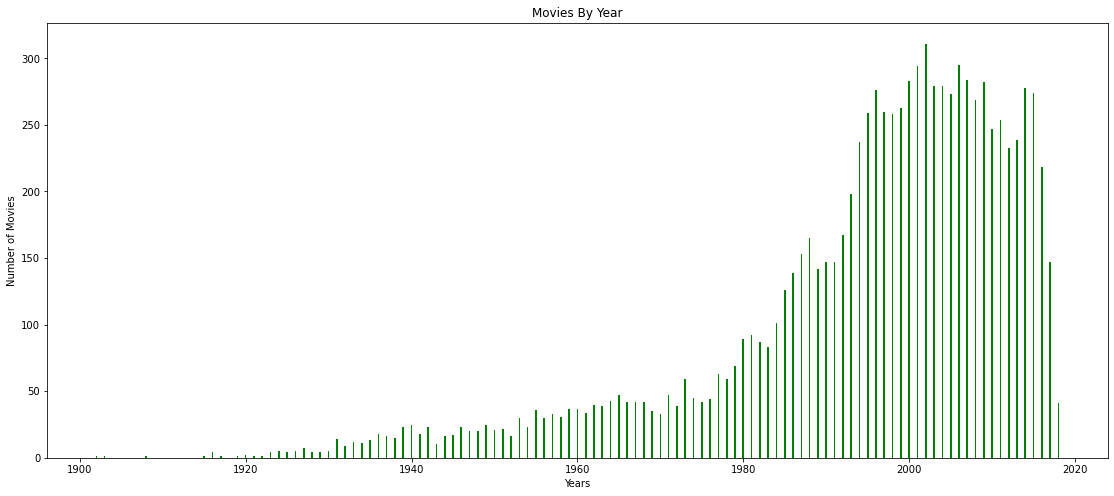

In [41]:
## ratings bar plot
xs = by_year['year']
ys = by_year['Count']
fig, ax = plt.subplots(figsize=(19,8))
ax.bar(xs,ys, width=0.2, color='green')
ax.set_title('Movies By Year')
ax.set_ylabel('Number of Movies')
ax.set_xlabel('Years')
plt.show()

I wonder if the year a movie was made or was rated has an influence on the average ratings.

## Create User - Rating Matrix

We will create a matrix that has users and columns for each movie with that user ratings. This will be a very large sparse matrix. -- lots of zeros...

use df  and pivot userId,movieId,rating

In [42]:
##create matrix from 
model_matrix = df.pivot(index='userId',columns='movieId',values='rating').fillna(0)
model_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
model_matrix.shape

(610, 9724)

In [44]:
non_zero = np.count_nonzero(model_matrix)
sparse_percentage = 1-(non_zero/(model_matrix.shape[0]*model_matrix.shape[1]))
print('matrix sparse percentage: {}%'.format(round(sparse_percentage *100)))


matrix sparse percentage: 98%


As expected this is a sparse matrix will help in deciding which direction we will move in our iterative modeling process.  Using the surprise library we will not need the model_matrix but it is interesting to see that our ratings data is 98% empty.  

## Surprise 

We will import the needed tools from the Surprise libray below and begin our iterative modeling process.


In [45]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, KNNWithMeans, KNNBasic, KNNBaseline, KNNWithZScore
from surprise.model_selection import GridSearchCV

We need our ratings data here.  Lets make sure that we have the right data.  We mostlikely need to drop the timestamp column still.


In [46]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [49]:
# drop timestamp
rate_df = ratings.drop('timestamp', axis=1)

In [50]:
#create the surprise dataset
reader=Reader()
data=Dataset.load_from_df(rate_df,reader)
dataset=data.build_full_trainset()
dataset

Lets explore the new surprise dataset to see if everything looks correct.  We can look at the items and users to see how it compares to our original data.

In [51]:
#print out users and items
items = dataset.n_items
users = dataset.n_users
print('Users: {}\tItems: {}'.format(users,items))

Users: 610	Items: 9724


This matches with our matrix above. We are ready to model.

## Iterative Modeling Process

For our modeling process we will begin with our baseline model.  Because we have seen this data before we will start with our best parameters from a SVD model and then grid search around those values to see if we can do better.  

### SVD
Singular Value Decomposition is a widely used dimensionality reduction tool.  
In our previous work we found by using gridsearch that {'n_factors': 50, 'reg_all': 0.05} were the best parameters. We will run that first for our baseline model.

In [52]:
#svd baseline
baseline_model = SVD(n_factors=50,reg_all=0.05,random_state=42)
baseline_model.fit(dataset)


In [53]:
#cross-validate baseline model
baseline_cv = cross_validate(baseline_model,data,n_jobs=-1)

In [54]:
#print out results
for i in baseline_cv.items():
    print(i,'/n')

('test_rmse', array([0.87292419, 0.87480653, 0.86203596, 0.86625415, 0.87279823])) /n
('test_mae', array([0.67031166, 0.67484311, 0.65947489, 0.66565538, 0.67077203])) /n
('fit_time', (2.674143075942993, 2.8889291286468506, 2.5926730632781982, 2.5686216354370117, 2.572183847427368)) /n
('test_time', (0.09735584259033203, 0.0801539421081543, 0.0864877700805664, 0.08407306671142578, 0.07862591743469238)) /n


In [55]:
model_avg = np.mean(baseline_cv['test_rmse'])
model_avg

0.8697638130807134

## Create a Dictionary To Store Model Results

We want to store our model name and rmse in a dictionary to easily compare.  We will also create a function to add further scores to our dictionary.

In [56]:
#score_dict will be used to store 
score_dict={}
def add_to_dict(dict,model,score):
    dict[model]=score
    return dict
add_to_dict(score_dict,'baseline_model',model_avg)

{'baseline_model': 0.8697638130807134}

## SVD GridSearch

Lets see if we can improve on on our model by using a parameter grid search.  

We used n_factors = 50(number of factors) and reg_all=0.05(regularization term)
for these we will include values closer to these to test, because we had a wider range in our previous work. 

lets include:
* n_epochs - The number of iterations default- 100
* lr_all – Parameter learning rate  default - 0.005

### Best Params
{'rmse': 0.8521706144532271, 'mae': 0.6524552323348267}
{'rmse': {'n_factors': 60, 'reg_all': 0.075, 'n_epochs': 50, 'lr_all': 0.01}, 'mae': {'n_factors': 60, 'reg_all': 0.075, 'n_epochs': 50, 'lr_all': 0.01}}

*don't run the next cell to save time...

In [36]:
#svd gridsearch  -  This will take some time.  Be patient.

#params = {'n_factors':[40,50,60],
         #'reg_all':[0.025,0.05, 0.075],
         #'n_epochs':[25,50,100],
         #'lr_all':[0.0025,0.005,0.01]}
#svd_gs = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
#svd_gs.fit(data)

In [37]:
#print(svd_gs.best_score)
#print(svd_gs.best_params)

{'rmse': 0.8524728116183674, 'mae': 0.6522596934130943}
{'rmse': {'n_factors': 60, 'reg_all': 0.075, 'n_epochs': 100, 'lr_all': 0.005}, 'mae': {'n_factors': 60, 'reg_all': 0.075, 'n_epochs': 100, 'lr_all': 0.005}}


## Function to Fit and Get RMSE Scores From Model

In [57]:
#our best model.  
best_svd = SVD(n_factors=60, reg_all=0.075, lr_all=0.01, random_state=42)

In [58]:
##function
def model_process(model,name,train=dataset,full_data=data,dict=score_dict):
    '''
    model- actual model
    name - string of model name for storing in dictionary
    train - training data
    full_data - all of the data
    dict - scoring dictionary
    
    '''
    #fit the model
    model.fit(train)
    
    #cross-validate the model
    model_cv = cross_validate(model,full_data,n_jobs=-1,cv=5,verbose=True)
    
    #score RMSE
    rmse = np.mean(model_cv['test_rmse'])
    
    #add to score dictionary
    add_to_dict(dict,name,rmse)
    
    return dict

In [59]:
#our best svd model just changes the reg_all. the others were default settings
best_svd = SVD(n_factors=60, reg_all=0.075,lr_all=0.01, random_state=42)
#fit, score and add to dictionary using function
model_process(best_svd,'best_svd',dataset,data,score_dict)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8619  0.8633  0.8602  0.8634  0.8573  0.8612  0.0023  
MAE (testset)     0.6607  0.6633  0.6623  0.6603  0.6598  0.6613  0.0013  
Fit time          2.95    2.98    2.96    2.99    2.93    2.96    0.02    
Test time         0.10    0.11    0.11    0.08    0.09    0.10    0.01    


{'baseline_model': 0.8697638130807134, 'best_svd': 0.8612200394839814}

This is only a slight improvement in our model.  Rememeber that our rating scale is 1-5.  So we are still off by about .86 of rating point.

Below we will try some other models

## KNN Algorithms

lets compare

* KNNBasic 
* KNNBaseline
* KNNWithMeans
* KNNWithZScore

We can do gridsearch with these to see if we can do better.

### KNNBasic



In [60]:
##KNNBasic
knn_basic = KNNBasic(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_basic,'knn_basic')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9763  0.9733  0.9630  0.9760  0.9711  0.9719  0.0049  
MAE (testset)     0.7563  0.7507  0.7452  0.7537  0.7502  0.7512  0.0037  
Fit time          0.30    0.31    0.32    0.29    0.31    0.31    0.01    
Test time         1.06    1.01    0.98    0.92    0.96    0.99    0.04    


{'baseline_model': 0.8697638130807134,
 'best_svd': 0.8612200394839814,
 'knn_basic': 0.9719480033097225}

### KNNBaseline



In [61]:
knn_baseline = KNNBaseline(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline,'knn_baseline')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8723  0.8767  0.8782  0.8795  0.8743  0.8762  0.0026  
MAE (testset)     0.6669  0.6699  0.6695  0.6727  0.6695  0.6697  0.0018  
Fit time          0.34    0.35    0.39    0.36    0.33    0.35    0.02    
Test time         1.44    1.39    1.42    1.38    1.34    1.39    0.03    


{'baseline_model': 0.8697638130807134,
 'best_svd': 0.8612200394839814,
 'knn_basic': 0.9719480033097225,
 'knn_baseline': 0.8762061326838053}

### KNNWithMeans

In [62]:
#KNNWithMeans
knn_wm = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_wm,'knn_wm')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8980  0.8923  0.8986  0.9000  0.8951  0.8968  0.0028  
MAE (testset)     0.6833  0.6806  0.6836  0.6855  0.6821  0.6830  0.0016  
Fit time          0.29    0.31    0.31    0.32    0.31    0.31    0.01    
Test time         1.11    1.14    1.11    1.07    1.04    1.09    0.04    


{'baseline_model': 0.8697638130807134,
 'best_svd': 0.8612200394839814,
 'knn_basic': 0.9719480033097225,
 'knn_baseline': 0.8762061326838053,
 'knn_wm': 0.8968042594358971}

### KNNWithZScore

In [63]:
knn_wzs = KNNWithZScore(sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_wzs,'knn_wzs')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8890  0.8956  0.8916  0.8928  0.9017  0.8942  0.0043  
MAE (testset)     0.6708  0.6738  0.6740  0.6768  0.6808  0.6752  0.0034  
Fit time          0.34    0.36    0.33    0.33    0.33    0.34    0.01    
Test time         1.26    1.22    1.22    1.20    1.18    1.22    0.02    


{'baseline_model': 0.8697638130807134,
 'best_svd': 0.8612200394839814,
 'knn_basic': 0.9719480033097225,
 'knn_baseline': 0.8762061326838053,
 'knn_wm': 0.8968042594358971,
 'knn_wzs': 0.8941517416252891}

the knn_baseline model was the best of the 3 and just a little bit higher than our best svd model.  We can try to tune that model to see if we can improve the performance.

### KNNBaseline HyperTuning


In [64]:
#KNNBaseline with more parameters
knn_baseline_min_k_5 = KNNBaseline(min_k=5,sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline_min_k_5,'knn_baseline_min_k_5')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8680  0.8710  0.8730  0.8567  0.8644  0.8666  0.0057  
MAE (testset)     0.6630  0.6698  0.6661  0.6552  0.6638  0.6636  0.0048  
Fit time          0.34    0.35    0.34    0.35    0.34    0.34    0.00    
Test time         1.42    1.40    1.38    1.39    1.33    1.38    0.03    


{'baseline_model': 0.8697638130807134,
 'best_svd': 0.8612200394839814,
 'knn_basic': 0.9719480033097225,
 'knn_baseline': 0.8762061326838053,
 'knn_wm': 0.8968042594358971,
 'knn_wzs': 0.8941517416252891,
 'knn_baseline_min_k_5': 0.8666279288742743}

In [65]:
#KNNBaseline with more parameters
knn_baseline_k_30 = KNNBaseline(min_k=30,sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline_k_30,'knn_baseline_k_30')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8728  0.8718  0.8642  0.8616  0.8628  0.8667  0.0047  
MAE (testset)     0.6711  0.6647  0.6654  0.6636  0.6640  0.6657  0.0027  
Fit time          0.37    0.37    0.35    0.34    0.33    0.35    0.01    
Test time         1.42    1.40    1.38    1.39    1.33    1.38    0.03    


{'baseline_model': 0.8697638130807134,
 'best_svd': 0.8612200394839814,
 'knn_basic': 0.9719480033097225,
 'knn_baseline': 0.8762061326838053,
 'knn_wm': 0.8968042594358971,
 'knn_wzs': 0.8941517416252891,
 'knn_baseline_min_k_5': 0.8666279288742743,
 'knn_baseline_k_30': 0.866651834670269}

These both slightly improved our RMSE.  It may warrant taking the time to run a gridsearch with different values of k, min_k

### GridSearchCV with KNNBaseline


In [66]:
#this will take a minute or so....
params = {'k': [15,30,40],
          'min_k': [1,3,5]} 
kb = KNNBaseline(sim_options = {'name': 'pearson', 'user_based': True})
knnbaseline_gs = GridSearchCV(KNNBaseline,param_grid=params)
knnbaseline_gs.fit(data)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [67]:
#Get the scores and best params
print(knnbaseline_gs.best_params)
print(knnbaseline_gs.best_score)

{'rmse': {'k': 30, 'min_k': 5}, 'mae': {'k': 30, 'min_k': 5}}
{'rmse': 0.8649211789952378, 'mae': 0.6630059115258815}


In [68]:
knn_baseline_best = KNNBaseline(k=30,min_k=5,sim_options={'name': 'pearson', 'user_based': True},random_state=42)
model_process(knn_baseline_best,'knn_baseline_best')

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8701  0.8597  0.8624  0.8657  0.8713  0.8658  0.0044  
MAE (testset)     0.6659  0.6575  0.6629  0.6649  0.6668  0.6636  0.0033  
Fit time          0.35    0.34    0.36    0.34    0.33    0.35    0.01    
Test time         1.30    1.28    1.28    1.24    1.24    1.26    0.02    


{'baseline_model': 0.8697638130807134,
 'best_svd': 0.8612200394839814,
 'knn_basic': 0.9719480033097225,
 'knn_baseline': 0.8762061326838053,
 'knn_wm': 0.8968042594358971,
 'knn_wzs': 0.8941517416252891,
 'knn_baseline_min_k_5': 0.8666279288742743,
 'knn_baseline_k_30': 0.866651834670269,
 'knn_baseline_best': 0.8658275098550645}

## Final Model Selection
Our best_svd model has the best results.  Since there is not a lot of progress it is best to move on with this model.  

We will use this model to make predicitons and reccomendations


## Making Predicitons

,movieId,title,genres,year
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [69]:
#making predictions for user 10 movie 1
pred = best_svd.predict(10,1)
pred

Prediction(uid=10, iid=1, r_ui=None, est=3.4843803919078966, details={'was_impossible': False})

In [70]:
#use the movies dataframe to get actual movie information for reccomendations
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


## Displaying Movies

In [155]:
#retrieve movie information from our prediction
title = movies.loc[movies['movieId'] == pred[1]]['title'][0]
genre = movies.loc[movies['movieId'] == pred[1]]['genres'][0]
pred_rating=round(pred[3],1)
print('Title: {}\nGenre: {}\nProjected Rating: {}'.format(title,genre,pred_rating))

Title: Toy Story (1995)
Genre: Adventure|Animation|Children|Comedy|Fantasy
Projected Rating: 3.5


## Find n Movie Reccomendations For Specific User

Below we will create a function that will return n movies for a specific user.

In [72]:
#get number of items 
dataset.n_items

9724

In [168]:
#import heapq for getting top items from list
import heapq
#import regex
import re
#define reccomendation function
def n_movies_rec(user,model,n=5, movie_list=movies):
    
    '''
    this will return n number of movies for a specific user.
    
    user - which user
    model - model to make the predictions
    n- number of reccomendations(default 5)
    movie_list -df of movies to pick from -  default(movies(all of the items))
    '''
    display_movies = []
    #get the items from the dataset
    total_items = dataset.n_items
    
    
    #list for movie ratings
    movie_ratings = []

 
    #create a list of movieId's 
    #ids_list = [pd.unique(movie_list['movieId'])]
   
    #populate movie_ratings for raw list
    for item in range(total_items):
        #append the movie to the movie_rating list if it is in the movie_list
        movie_ratings.append(model.predict(user,item))
    
    #remove any movies from movie_ratings not in movie list before getting the highest rated
    #print(movie_ratings)
    for mov in movie_ratings:
        mov_id = movie_list.loc[movie_list['movieId'] == mov[1]]['movieId']
        print()
    
    #use heapq.nlagerst to get the N highest rated movies.
    raw_list = heapq.nlargest(n,movie_ratings,key=lambda x:x[3])
    
    # get movie info from movies dataframe
    for p in raw_list:
        temp = movie_list.loc[movie_list['movieId'] == p[1]]
        title = temp.title.to_string()
        title = re.sub("[^a-zA-Z0-9(),'']+", " ", title)
        genre = temp.genres.to_string()
        genre = re.sub("[^a-zA-Z|]+", " ", genre)
        rating = 'predicted rating: ' + str(round(p[3],2))
        display_movies.append(rating+ ' ' + title +' '+ genre)
        
    print('Movie Reccomendations for user: {}'.format(user))
    return display_movies

#test the function for 10 movies for user 110
n_movies_rec(110,best_svd, 10)

Series([], Name: movieId, dtype: int64)
0    1
Name: movieId, dtype: int64
1    2
Name: movieId, dtype: int64
2    3
Name: movieId, dtype: int64
3    4
Name: movieId, dtype: int64
4    5
Name: movieId, dtype: int64
5    6
Name: movieId, dtype: int64
6    7
Name: movieId, dtype: int64
7    8
Name: movieId, dtype: int64
8    9
Name: movieId, dtype: int64
9    10
Name: movieId, dtype: int64
10    11
Name: movieId, dtype: int64
11    12
Name: movieId, dtype: int64
12    13
Name: movieId, dtype: int64
13    14
Name: movieId, dtype: int64
14    15
Name: movieId, dtype: int64
15    16
Name: movieId, dtype: int64
16    17
Name: movieId, dtype: int64
17    18
Name: movieId, dtype: int64
18    19
Name: movieId, dtype: int64
19    20
Name: movieId, dtype: int64
20    21
Name: movieId, dtype: int64
21    22
Name: movieId, dtype: int64
22    23
Name: movieId, dtype: int64
23    24
Name: movieId, dtype: int64
24    25
Name: movieId, dtype: int64
25    26
Name: movieId, dtype: int64
26    27
Name: mo

Series([], Name: movieId, dtype: int64)
492    567
Name: movieId, dtype: int64
493    568
Name: movieId, dtype: int64
494    569
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
495    573
Name: movieId, dtype: int64
496    574
Name: movieId, dtype: int64
497    575
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
498    577
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
499    579
Name: movieId, dtype: int64
500    580
Name: movieId, dtype: int64
501    581
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
502    583
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
503    585
Name: movieId, dtype: int64
504    586
Name: movieId, dtype: int64
505    587
Name: movieId, dtype: int64
506    588
Name: movieId, dtype: int64
507    589
Name: movieId, dtype: int64
508    590
Name: movieId, dtype: int64
Series([], Name: 

860    1131
Name: movieId, dtype: int64
861    1132
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
862    1135
Name: movieId, dtype: int64
863    1136
Name: movieId, dtype: int64
864    1137
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
865    1140
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
866    1144
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
867    1147
Name: movieId, dtype: int64
868    1148
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
869    1150
Name: movieId, dtype: int64
870    1151
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)


Series([], Name: movieId, dtype: int64)
1228    1631
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
1229    1633
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
1230    1635
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
1231    1639
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
1232    1641
Name: movieId, dtype: int64
1233    1642
Name: movieId, dtype: int64
1234    1643
Name: movieId, dtype: int64
1235    1644
Name: movieId, dtype: int64
1236    1645
Name: movieId, dtype: int64
1237    1646
Name: movieId, dtype: int64
1238    1647
Name: movieId, dtype: int64
1239    1648
Name: movieId, dtype: int64
1240    1649
Name: movieId, dtype: int64
1241    1650
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
1242    1652
Name: movieId, dtype: int64
1243    1653
Name: movieId, dtype: int64
1244    1654
Name: movie

1588    2130
Name: movieId, dtype: int64
1589    2131
Name: movieId, dtype: int64
1590    2132
Name: movieId, dtype: int64
1591    2133
Name: movieId, dtype: int64
1592    2134
Name: movieId, dtype: int64
1593    2135
Name: movieId, dtype: int64
1594    2136
Name: movieId, dtype: int64
1595    2137
Name: movieId, dtype: int64
1596    2138
Name: movieId, dtype: int64
1597    2139
Name: movieId, dtype: int64
1598    2140
Name: movieId, dtype: int64
1599    2141
Name: movieId, dtype: int64
1600    2142
Name: movieId, dtype: int64
1601    2143
Name: movieId, dtype: int64
1602    2144
Name: movieId, dtype: int64
1603    2145
Name: movieId, dtype: int64
1604    2146
Name: movieId, dtype: int64
1605    2147
Name: movieId, dtype: int64
1606    2148
Name: movieId, dtype: int64
1607    2149
Name: movieId, dtype: int64
1608    2150
Name: movieId, dtype: int64
1609    2151
Name: movieId, dtype: int64
1610    2152
Name: movieId, dtype: int64
1611    2153
Name: movieId, dtype: int64
1612    2154
Nam

Name: movieId, dtype: int64
1981    2630
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
1982    2632
Name: movieId, dtype: int64
1983    2633
Name: movieId, dtype: int64
1984    2634
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
1985    2639
Name: movieId, dtype: int64
1986    2640
Name: movieId, dtype: int64
1987    2641
Name: movieId, dtype: int64
1988    2642
Name: movieId, dtype: int64
1989    2643
Name: movieId, dtype: int64
1990    2644
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
1991    2648
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
1992    2651
Name: movieId, dtype: int64
1993    2652
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)

2361    3129
Name: movieId, dtype: int64
2362    3130
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2363    3132
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2364    3134
Name: movieId, dtype: int64
2365    3135
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
2366    3138
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
2367    3141
Name: movieId, dtype: int64
2368    3142
Name: movieId, dtype: int64
2369    3143
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2370    3145
Name: movieId, dtype: int64
2371    3146
Name: movieId, dtype: int64
2372    3147
Name: movieId, dtype: int64
2373    3148
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2374    3150
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2375    3152
Name: movieId, dtype: int64
2376    3153
Name: movieI

Name: movieId, dtype: int64
2706    3629
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
2707    3632
Name: movieId, dtype: int64
2708    3633
Name: movieId, dtype: int64
2709    3634
Name: movieId, dtype: int64
2710    3635
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2711    3637
Name: movieId, dtype: int64
2712    3638
Name: movieId, dtype: int64
2713    3639
Name: movieId, dtype: int64
2714    3640
Name: movieId, dtype: int64
2715    3641
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2716    3643
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
2717    3646
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
2718    3648
Name: movieId, dtype: int64
2719    3649
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
2720    3652
Name: movieId, dtype: int

3075    4128
Name: movieId, dtype: int64
3076    4129
Name: movieId, dtype: int64
3077    4130
Name: movieId, dtype: int64
3078    4131
Name: movieId, dtype: int64
3079    4132
Name: movieId, dtype: int64
3080    4133
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3081    4135
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3082    4138
Name: movieId, dtype: int64
3083    4139
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3084    4141
Name: movieId, dtype: int64
3085    4142
Name: movieId, dtype: int64
3086    4143
Name: movieId, dtype: int64
3087    4144
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3088    4146
Name: movieId, dtype: int64
3089    4147
Name: movieId, dtype: int64
3090    4148
Name: movieId, dtype: int64
3091    4149
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3092    4152
Name: movi

Series([], Name: movieId, dtype: int64)
3402    4628
Name: movieId, dtype: int64
3403    4629
Name: movieId, dtype: int64
3404    4630
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3405    4632
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3406    4634
Name: movieId, dtype: int64
3407    4635
Name: movieId, dtype: int64
3408    4636
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3409    4638
Name: movieId, dtype: int64
3410    4639
Name: movieId, dtype: int64
3411    4640
Name: movieId, dtype: int64
3412    4641
Name: movieId, dtype: int64
3413    4642
Name: movieId, dtype: int64
3414    4643
Name: movieId, dtype: int64
3415    4644
Name: movieId, dtype: int64
3416    4645
Name: movieId, dtype: int64
3417    4646
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3418    4649
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieI

3713    5127
Name: movieId, dtype: int64
3714    5128
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3715    5131
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3716    5134
Name: movieId, dtype: int64
3717    5135
Name: movieId, dtype: int64
3718    5136
Name: movieId, dtype: int64
3719    5137
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3720    5139
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3721    5146
Name: movieId, dtype: int64
3722    5147
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3723    5151
Name: movieId, dt

Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3989    5628
Name: movieId, dtype: int64
3990    5629
Name: movieId, dtype: int64
3991    5630
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3992    5632
Name: movieId, dtype: int64
3993    5633
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3994    5635
Name: movieId, dtype: int64
3995    5636
Name: movieId, dtype: int64
3996    5637
Name: movieId, dtype: int64
3997    5638
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
3998    5640
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
3999    5643
Name: movieId, dtype: int64
4000    5644
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
4001    5646
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4002    5649
Name: movieId, dtype: int64
4003    5650
Name: movieId

4184    6031
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
4185    6033
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
4186    6035
Name: movieId, dtype: int64
4187    6036
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4188    6039
Name: movieId, dtype: int64
4189    6040
Name: movieId, dtype: int64
4190    6041
Name: movieId, dtype: int64
4191    6042
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
4192    6044
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4193    6049
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
4194    6051
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4195    6055
Name: movieId, d

Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4389    6440
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
4390    6442
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4391    6448
Name: movieId, dtype: int64
4392    6449
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4393    6452
Name: movieId, dtype: int64
4394    6453
Name: movieId, dtype: int64
4395    6454
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4396    6460
Name: movieId, dtype: int64
4397    6461
Name: movieId, dtype: int64
Series([], Name: movieId, dtype

Name: movieId, dtype: int64
4627    6890
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4628    6893
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4629    6898
Name: movieId, dtype: int64
4630    6899
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4631    6902
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4632    6909
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
4633    6911
Name: movieId, dtype: int64
4634    6912
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Seri

Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4929    7394
Name: movieId, dtype: int64
4930    7395
Name: movieId, dtype: int64
4931    7396
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4932    7411
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
4933    7414
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: in

Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
5070    7976
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
5071    7979
Name: movieId, dtype: int64
5072    7980
Name: movieId, dtype: int64
5073    7981
Name: movieId, dtype: in

Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
5221    8526
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
5222    8528
Name: movieId, dtype: int64
5223    8529
Name: movieId, dtype: int64
5224    8530
Name: movieId, dtype: int64
5225    8531
Name: movieId, dtype: int64
5226    8532
Name: movieId, dtype: int64
5227    8533
Name: movieId, dtype: int64
5228    8534
Name: movieId, dtype: int64
5229    8535
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
5230    8542
Name: movieId, dtype: int64
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtyp

Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)


Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)
Series([], Name: movieId, dtype: int64)


['predicted rating: 4.41 277 Shawshank Redemption, The (1994)  Crime|Drama',
 'predicted rating: 4.39 602 Dr Strangelove or How I Learned to Stop Worr   Comedy|War',
 'predicted rating: 4.38 257 Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller',
 'predicted rating: 4.37 906 Lawrence of Arabia (1962)  Adventure|Drama|War',
 'predicted rating: 4.37 841 Streetcar Named Desire, A (1951)  Drama',
 'predicted rating: 4.36 975 Cool Hand Luke (1967)  Drama',
 'predicted rating: 4.35 2283 Yojimbo (1961)  Action|Adventure',
 'predicted rating: 4.34 924 Grand Day Out with Wallace and Gromit, A (1989)  Adventure|Animation|Children|Comedy|Sci Fi',
 'predicted rating: 4.34 585 Wallace Gromit The Best of Aardman Animatio   Adventure|Animation|Comedy',
 'predicted rating: 4.34 46 Usual Suspects, The (1995)  Crime|Mystery|Thriller']

In [74]:
#try out another user to make sure this is working and giving different recs.
n_movies_rec(8,best_svd)

Movie Reccomendations for user: 8


['predicted rating: 4.5 277 Shawshank Redemption, The (1994)  Crime|Drama',
 "predicted rating: 4.46 2582 Guess Who's Coming to Dinner (1967)  Drama",
 'predicted rating: 4.45 841 Streetcar Named Desire, A (1951)  Drama',
 'predicted rating: 4.44 659 Godfather, The (1972)  Crime|Drama',
 'predicted rating: 4.42 883 Paths of Glory (1957)  Drama|War']

This will give us reccomendations for existing users.  We will then need to add by category and beable to create a new user and provide results

## Obtain New User Ratings

We will create a function to obtain new user ratings.  We will want to gather at least 5 ratings in order to make reccomendations from our model.  The user will be given movies to rate on a scale of 0.5 to 5.  They should have the option to skip a movie if they have not seen it.  

* use survey_movies dataframe for this function.  This should make it more likely that the new user has seen the movie

We need to be able to do the following:

* get new user ratings 
* add ratings to the ratings 'data'
* read the data into a suprise dataset
* train the model
* return the predicitons (5)

We will create funcitons to work through this process and then create a master function to complete the entire process.

### Get New User Ratings
We need to use the original rate_df to add the ratings of the new user. 

In [78]:
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [79]:
np.max(rate_df.userId)

610

In [80]:
sm_df = survey_movies.drop('rating',axis=1)


In [81]:
sm_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1235 entries, (1, 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy') to (168252, 'Logan (2017)', 'Action|Sci-Fi')
Empty DataFrame

In [82]:
sm_df = sm_df.reset_index()


In [83]:
sm_df

,movieId,title,genres
,,,
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
1230,148626,"Big Short, The (2015)",Drama
1231,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
1232,164179,Arrival (2016),Sci-Fi


In [84]:
def new_user_ratings(movies,n,genre=None):
    '''
    movies - selected movie dataframe
    n - (int) number of movies
    genre- (str) can specify a genre to further limit the data
    '''

    #narrow down the movies if genre is selected
    to_be_rated = movies
    if genre:
        to_be_rated = movies[movies['genres'].str.contains(genre)]
    
    #create new user id one higher than the max userId value
    user_id = np.max(rate_df.userId)+1
    
    #list to store the new ratings
    ratings = []
    
    #use while loop to get n ratings from our survey_movies
    while n > 0:
        # select a sample movie
        movie = to_be_rated.sample(1)
        #clean up the presentation of the movie for the survey
        title = movie.title.to_string()
        title = re.sub("[^a-zA-Z0-9(),'']+", " ", title)
        print(title)
        rating = input("Rate the movie from 1-5.  enter 'x' if you haven't seen the film ")
        # make sure user enters an acceptable value
        if rating not in ['1','2','3','4','5']:
            continue
        else:
            #need to use column names from rate_df
            rated = {'userId':user_id,'movieId':movie['movieId'].values[0],'rating':rating}
            ratings.append(rated)
            n -=1
            
    return pd.DataFrame(ratings)


In [85]:
new_ratings = new_user_ratings(sm_df,5)
new_ratings

749 Road Warrior, The (Mad Max 2) (1981)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 3
936 Battle Royale (Batoru rowaiaru) (2000)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film n
997 Sin City (2005)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film n
996 Constantine (2005)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 2
234 Casablanca (1942)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 2
149 Last Action Hero (1993)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 3
1068 Live Free or Die Hard (2007)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 3


,userId,movieId,rating
0,611,3703,3
1,611,31696,2
2,611,912,2
3,611,485,3
4,611,53972,3


### Add Ratings to the Original Ratings Data

We want to add these to rate_df

In [86]:
rate_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [87]:
#define function to add movies to the Data - read into surprise
def add_ratings(new_rate, existing_data):
    existing_data = pd.concat([new_rate, existing_data],ignore_index=True)
    updated_ratings = Dataset.load_from_df(existing_data,reader)
    rate_df = existing_data
    #return both the dataframe and surprise dataframe
    return existing_data,updated_ratings

### Fit Model
best_svd = SVD(n_factors=60, reg_all=0.075, lr_all=0.01, random_state=42)

use the new add_ratings function to fit the the model

In [88]:
#fit the model using the add_ratings function
best_svd = SVD(n_factors=60, reg_all=0.075, lr_all=0.01, random_state=42)
ratings,surprise_ratings = add_ratings(new_ratings,rate_df)
best_svd.fit(surprise_ratings.build_full_trainset())

In [89]:
ratings.describe()

,userId,movieId
count,100841.000000,100841.000000
mean,326.141688,19435.232167
std,182.624980,35530.426285
min,1.000000,1.000000
25%,177.000000,1199.000000
50%,325.000000,2991.000000
75%,477.000000,8125.000000
max,611.000000,193609.000000


### Return Predictions 
use 'n_movies_rec' function to return 5 movies.


In [90]:
n_movies_rec(np.max(ratings.userId),best_svd)

Movie Reccomendations for user: 611


["predicted rating: 3.85 2582 Guess Who's Coming to Dinner (1967)  Drama",
 'predicted rating: 3.85 841 Streetcar Named Desire, A (1951)  Drama',
 'predicted rating: 3.8 277 Shawshank Redemption, The (1994)  Crime|Drama',
 'predicted rating: 3.74 731 His Girl Friday (1940)  Comedy|Romance',
 'predicted rating: 3.73 2562 Creature Comforts (1989)  Animation|Comedy']

### Put it all Together

Function to get some user preferences.  This is being added to narrow down the types of movies being reccomended.
We can ask the user a few questions to limit the pool of movies using year and genre.  the function should return a dataframe that can be used in the user_survey() function 

In [101]:
movies[movies['year']>1980]

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0


In [117]:
def questionnaire():
    """
    this funciton will take the movies dataframe and return an custom dataframe based on the users response to a few 
    questions.
    
    """
    # year
    print('Our movie library contains films from {} to {}.'.format(int(min_year),int(max_year)))
    year_range=input("Type 'yes' if you would like to narrow the range of your customized reccomendations? ")
    # genre
    if year_range == 'yes':
        oldest = int(input('Enter the first year of your desired range? '))
        newest = int(input('Enter the last year of your desired range? '))
        custom_movies = movies[(movies['year'] >= oldest ) & (movies['year']<=newest)]
    else:
        custom_movies = movies
    print(type(custom_movies))
    return custom_movies
questionnaire()

Our movie library contains films from 1902 to 2018.
Type 'yes' if you would like to narrow the range of your customized reccomendations? no
<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0


Below we will create a new function to run all of this on account creation.

### Limit the rate_df by user selection

Testing out code for the function below.  When the questionnaire was added it created a need to update other parts of the function

In [125]:
##rate_df needs to match the custom_movies dataframe created after the questionaire
id_ins = [2291,55269]
testing_df = rate_df[rate_df['movieId'].isin(id_ins)]
testing_df

,userId,movieId,rating
1,615,2291,3
2,615,55269,1
159,1,2291,5
1936,18,2291,4
5176,33,2291,2
...,...,...,...
96640,603,2291,4
97228,605,2291,3.5
97756,606,2291,4
99045,608,2291,3.5


This worked, but it will probably be easier to limit the movies in the n_rec_movies function.

In [126]:
def user_survey():
    '''
    completes the entire process of rating the movies and running the model and
    displaying the predictions
    '''
    # make rate_df global var to be able to update inside of the function
    global rate_df
    #use updated dataframe if it is longer than rate_df-- it will be after the first time it runs
    
    # How many movies do you want to rate?
    movie_count = int(input('How many movies would you like to rate? (enter number greater than 0) '))
    while movie_count < 1:
        movie_count = int(input('How many movies would you like to rate? (enter number greater than 0) '))
    
    # get ratings - gets list of the rated movies
    new_ratings = new_user_ratings(sm_df,movie_count)
    
    #Trim down the movie pool for reccomendations based on user questions
    movie_list = questionnaire()
    
    #create model
    best_svd = SVD(n_factors=60, reg_all=0.075, lr_all=0.01, random_state=42)
    
    #update movie data and create new surprise data
    rate_data, surprise_ratings = add_ratings(new_ratings,rate_df)
    
    #fit the model
    dataset = surprise_ratings.build_full_trainset()
    best_svd.fit(dataset)
    
    #produce reccomendations
    #the current user is the one with higest userId
    user = np.max(rate_data.userId)
    recs = n_movies_rec(user,best_svd,5,movie_list)
    
    rate_df = rate_data
    return recs
#test a user
user_survey()   

How many movies would you like to rate? (enter number greater than 0) 3
136 Coneheads (1993)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 3
135 Cliffhanger (1993)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 3
12 Copycat (1995)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 2
Our movie library contains films from 1902 to 2018.
Type 'yes' if you would like to narrow the range of your customized reccomendations? yes
Enter the first year of your desired range? 2000
Enter the last year of your desired range? 2019
<class 'pandas.core.frame.DataFrame'>
Movie Reccomendations for user: 616


['predicted rating: 4.3 Series( , ) Series ',
 'predicted rating: 4.27 Series( , ) Series ',
 'predicted rating: 4.22 Series( , ) Series ',
 'predicted rating: 4.2 Series( , ) Series ',
 'predicted rating: 4.18 Series( , ) Series ']

We have the movie predictions working.  Trying to figure out how to udate the rate_df in the function without throwing an error

In [118]:
#test another user
user_survey()

How many movies would you like to rate? (enter number greater than 0) 3
232 Apartment, The (1960)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 3
539 Edward Scissorhands (1990)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 3
1078 Darjeeling Limited, The (2007)
Rate the movie from 1-5.  enter 'x' if you haven't seen the film 1
Our movie library contains films from 1902 to 2018.
Type 'yes' if you would like to narrow the range of your customized reccomendations? yes
Enter the first year of your desired range? 1999
Enter the last year of your desired range? 2009
<class 'pandas.core.frame.DataFrame'>
Movie Reccomendations for user: 615


['predicted rating: 3.86 Series( , ) Series ',
 'predicted rating: 3.81 Series( , ) Series ',
 'predicted rating: 3.74 Series( , ) Series ',
 'predicted rating: 3.73 Series( , ) Series ',
 'predicted rating: 3.73 Series( , ) Series ']